# Question 1
- Learn and understand Zipf’s Law

In [1]:
import nltk
import glob
import collections
import re
import csv
from math import log
import matplotlib.pyplot as plt

In [2]:
filepaths = glob.glob("/Users/lizhiming/nltk_data/**/bible*", recursive = True)    #use glob to open files

In [3]:
def get_words(text):                               # define a function to extract words from the file
    return re.compile('[A-Za-z]+').findall(text)   

In [4]:
for name in filepaths:
    with open(name) as file:
        word_freq = collections.Counter()          #use Counter to get word frequency
        for line in file:
            for word in get_words(line):
                word.lower()
                word_freq[word] += 1

In [5]:
with open('data.csv', 'w') as csvfile:             #write data into csv file
    writer = csv.writer(csvfile)
    writer.writerow(['word', 'rank', 'frequency'])
    rank = 0
    for word in word_freq.most_common():           #use Counter.most_common() to rank the words based on frequency
        rank += 1
        writer.writerow([word[0], rank, word[1]])

In [6]:
with open('data.csv', 'r') as csvfile:             #read data from csv file
    reader = csv.reader(csvfile)
    next(reader)
    rank = []
    frequency = []
    for row in reader:
        rank.append(row[1])
        frequency.append(row[2])

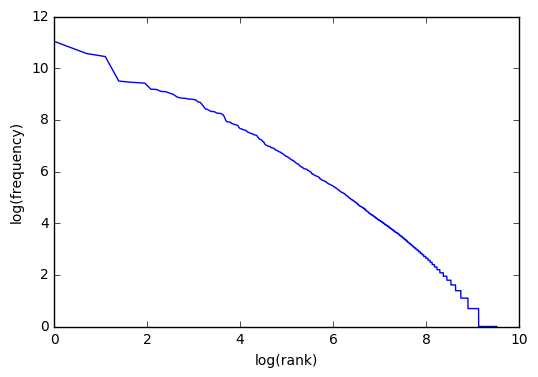

In [7]:
y = list(map(lambda y: log(float(y)), frequency))  #use lambda function to get the log of every element in the list
x = list(map(lambda x: log(float(x)), rank))
plt.plot(x, y)
plt.ylabel('log(frequency)')
plt.xlabel('log(rank)')
plt.show()                                         #use matplotlib to plot log-log graph

# Conclusion
- The slope of the log-log figure approximately equals to -1, which complies with Zipf's law.
- For highest and lowest frequency words (the area where the line crosses the x-axis and y-axis, Zipf's law makes most errors.